In [64]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import analysis_kit as ak

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Use the EDHEC Hedge Fund Indices data set that we used in the lab assignment as well as in the previous week’s assignments. Load them into Python and perform the following analysis based on data since 2000 (including all of 2000): What was the Monthly Parametric Gaussian VaR at the 1% level (as a +ve number) of the Distressed Securities strategy?

In [59]:
hfi_data= ak.get_hfi_returns()
hfi_data=hfi_data["2000":]
hfi_data.tail()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022
2018-10,-0.0073,-0.0314,-0.0158,-0.0315,-0.0129,-0.0257,-0.0023,-0.0096,-0.0402,-0.0080,-0.0109,0.0237,-0.0269
2018-11,-0.0068,-0.0053,-0.0193,0.0120,-0.0211,-0.0034,-0.0067,-0.0087,-0.0044,0.0119,-0.0063,-0.0021,-0.0071


In [62]:
ak.var_gaussian(hfi_data["Distressed Securities"], level=1)

0.03143017693928047

In [61]:
ak.var_corfish(hfi_data["Distressed Securities"],level=1, modified=True)

0.04966909110627918

In [60]:
ak.var_historic(hfi_data["Distressed Securities"],level=1)

0.042642

##### Next, load the 30 industry return data using the erk.get_ind_returns() function that we developed during the lab sessions. For purposes of the remaining questions, use data during the 5 year period 2013-2017 (both inclusive) to estimate the expected returns as well as the covariance matrix. To be able to respond to the questions, you will need to build the MSR, EW and GMV portfolios consisting of the “Books”, “Steel”, "Oil", and "Mines" industries. Assume the risk free rate over the 5 year period is 10%.

##### What is the weight of Steel in the EW Portfolio? 

We dont have to write any code for this coz it is an equal weighted portfolio. This means each asset is allocated equal weights.
In our case, since we have four assets, each gets 25% allocation

##### What is the weight of the largest component of the MSR portfolio?   

In [6]:
ind_returns= ak.get_ind_returns()
ind_returns= ind_returns["2013":"2017"]

In [20]:
ind_names=["Books","Steel","Oil","Mines"]
final_ind_rets=ind_returns[ind_names]
final_ind_rets.head()

,Books,Steel,Oil,Mines
2013-01,0.0513,0.0428,0.0788,0.0059
2013-02,-0.0654,-0.0268,0.0052,-0.0756
2013-03,0.0778,0.0210,0.0209,0.0091
2013-04,-0.0029,-0.0441,-0.0129,-0.1057
2013-05,0.0479,0.0384,0.0307,0.0022


In [9]:
er=ak.annualize_rets(final_ind_rets,12)
er

Books    0.095312
Steel    0.100716
Oil      0.025275
Mines    0.005136
dtype: float64

In [21]:
cov=final_ind_rets.cov()
cov

,Books,Steel,Oil,Mines
Books,0.002720,0.001940,0.001637,0.001539
Steel,0.001940,0.004391,0.002122,0.003391
Oil,0.001637,0.002122,0.002697,0.002179
Mines,0.001539,0.003391,0.002179,0.005232


In [18]:
w6= ak.minimize_vol(0.06, er, cov)
vol6= ak.portfolio_vol(w6, cov)
vol6

0.046350972249217484

In [19]:
w6

array([0.47303492, 0.03652847, 0.43280248, 0.05763413])

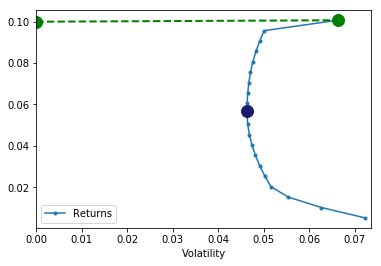

In [37]:
ak.plot_ef(20,er, cov, rf_rate=0.10, show_cml=True, show_gmv=True)

In [36]:
w_msr=np.around(ak.msr(0.1,er, cov), 4)
w_msr

array([0., 1., 0., 0.])

#### This means that the Steel industry get the highest allocation. Not only highest, they get all the allocation of capital.

##### What is the weight of the largest component of the GMV portfolio?

In [38]:
w_gmv=ak.gmv(cov)
w_gmv

array([0.47702487, 0.        , 0.43411202, 0.08886311])

##### Assume two different investors invested in the GMV and MSR portfolios at the start of 2018 using the weights we just computed. Compute the annualized volatility of these two portfolios over the next 12 months of 2018? (Hint: Use the portfolio_vol code we developed in the lab and use ind[“2018”][l].cov() to compute the covariance matrix for 2018, assuming that the variable ind holds the industry returns and the variable l holds the list of industry portfolios you are willing to hold. Don’t forget to annualize the volatility)

##### What would be the annualized volatility over 2018 using the weights of the MSR portfolio?

In [46]:
ind_returns1= ak.get_ind_returns()
ind_returns1=ind_returns1["2018"]

In [47]:
ind_names=["Books","Steel","Oil","Mines"]
final_ind_rets1=ind_returns1[ind_names]
final_ind_rets1.head()

,Books,Steel,Oil,Mines
2018-01,0.0449,0.0361,0.0286,0.0357
2018-02,-0.0325,-0.0199,-0.1102,-0.0335
2018-03,0.0031,-0.0586,0.0308,-0.0015
2018-04,-0.0062,0.0366,0.1030,-0.0339
2018-05,-0.0061,0.0562,0.0343,0.0308


In [49]:
er1=ak.annualize_rets(final_ind_rets1, 12)
er1

Books   -0.252523
Steel   -0.273127
Oil     -0.181373
Mines   -0.307972
dtype: float64

In [50]:
cov1=final_ind_rets1.cov()
cov1

,Books,Steel,Oil,Mines
Books,0.002799,0.002098,0.002558,0.001629
Steel,0.002098,0.004027,0.003473,0.001843
Oil,0.002558,0.003473,0.005296,0.001961
Mines,0.001629,0.001843,0.001961,0.002059


Annualized returns (2018) for the msr weights calc:


In [49]:
er1=ak.annualize_rets(final_ind_rets1, 12)
er1

Books   -0.252523
Steel   -0.273127
Oil     -0.181373
Mines   -0.307972
dtype: float64

#### Annualized vol of msr portfolio using the above old weights: To find the ann vol, we must first find the periodic vol

In [73]:
periodic_vol_msr=ak.portfolio_vol(w_msr, cov1)
periodic_vol_msr # In other words, this is the monthly volatility of the msr portfolio in 2018

0.06346230747220723

In [75]:
# For annualized vol

ann_vol_msr=(periodic_vol_msr)*12**0.5
ann_vol_msr

0.21983988181484185

#### Annualized vol of gmv portfolio using the above old weights: To find the ann vol, we must first find the periodic vol

In [83]:
periodic_vol_gmv=ak.portfolio_vol(w_gmv, cov1)
periodic_vol_gmv # Monthly vol of the gmv portfolio in 2018

0.05477245348624742

In [84]:
ann_vol_gmv=(periodic_vol_gmv)*12**0.5
ann_vol_gmv

0.18973734458676722